<center>
<h1>Compte rendu du TP n°3</h1>
<h2> Modèles à énergie et machines de Boltzmann restreintes</h2>
<h3> Arnaud Aillaud</h3>
16 novembre 2022
</center>

# I - Modèles à énergie


## 1.1. Généralités

Un modèle à énergie (Energy-Based Model EBM) est un modèle génératif s'appuyant sur des équations issues du monde de la physique statistique. Bien que capables de générer des images, la force des EBM réside plus dans leur capacité à apprendre la distribution sous-jacente d'un jeu de données à partir d'échantillons. Une fois entraîné, un EBM est capable de générer de nouvelles données (images, textes, ...) dont la distribution est semblable à celle des données initiales, mais peut aussi être utilisé pour vérifier si une nouvelle donnée correspond à la distribution initiale d'entraînement.

Comparaison de différents modèles génératifs:

|   | GAN | EBM | Normalizing Flow | Gaussian Mixture Model (GMM) |
|:-:|:---:|:---:|:----------------:|:---:|
|Facilité de générer une nouvelle image| $\checkmark$ | $\sim$ | $\checkmark$ |$\checkmark$ |
|Facilité d'estimer la distribution initiale <br> (i.e. vérifier si une nouvelle image provient de la même distribution que la distribution d'entraînement)| x | $\checkmark$ | $\checkmark$ |$\checkmark$ |


## 1.2. Définition

Par analogie avec la physique statistique, un modèle à énergie cherche à modéliser la densité de probabilité d'un processus inobservable $X$ à partir d'un processus observable $Y$ et d'une fonction d'énergie $E_{\theta}(x,y )$ qui attribue une valeur faible aux valeurs de $X$ (variables latentes ou cachées), et des valeurs élevées aux valeurs incorrectes. <br>
De manière générale, dans le cadre d'un modèle à énergie, la densité de probabilité du couple $(X, Y)$ s'écrit donc  sous la forme suivante :
$$p_{\theta}(x, y) = \dfrac{\mathrm{e}^{-E_{\theta}(x, y)}}{Z_{\theta}} \text{    ( équation de la distribution de Boltzmann)}$$ 
avec
> $E_{\theta}$ : $x → E_{\theta}(x, y)$ fonction d'énergie <br>
> $Z_{\theta}$ : constante de normalisation. <br>

$p_{\theta}$ étant une densité de probabilité, son intégrale sur l'ensemble des valeurs prises par $x$ vaut 1.
$$ \int_{y' \in \mathcal{Y}} p_{\theta}(x,y') dy' = 1 \Rightarrow Z_{\theta} = \int_{x' \in \mathcal{X}} \int_{y' \in \mathcal{Y}} \mathrm{e}^{-E_{\theta}(x', y')} dx'dy' $$

## 1.3. EBM en données complètes


Dans le cas particulier où $X$ est observable directement, on peut modéliser sa probabilité selon un modèle à énergie par l'équation suivante :
$$p_{\theta}(x) = \dfrac{\mathrm{e}^{-E_{\theta}(x)}}{Z_{\theta}}$$ 

Dans ce cas de figure, la constant de normalisation $Z_{\theta}$ se calcule donc ainsi :
$$ \int_{x \in \mathcal{X}} p_{\theta}(x) dx = 1 \Rightarrow \boxed{Z_{\theta} = \int_{x \in \mathcal{X}} \mathrm{e}^{-E_{\theta}(x)} dx} $$

On note $\mathcal{D} = \{x_i\}_{i \in 1,..,N}$ l'ensemble des observations de $X$, avec les $\{x_i\}_{i \in 1,..,N}$ i.i.d. ($x_i \sim p$)<br>
Il est alors possible d'estimer $\theta$ à partir de $X$ par la méthode du maximum de vraisemblance. <br>
$
\begin{align*}
\underset{\theta}{\mathrm{argmax}} \;p(\mathcal{D}|\theta) &= \underset{\theta}{\mathrm{argmax}} \;p_{\theta}(\mathcal{D}) = \underset{\theta}{\mathrm{argmax}} \;\prod^N_{i=1} p_{\theta}(x_i) && \text{car les $x_i$ sont i.i.d}\\
⇒ \underset{\theta}{\mathrm{argmax}} \;log(p_{\theta}(\mathcal{D})) &= \underset{\theta}{\mathrm{argmax}} \;\sum^N_{i=1} log(p_{\theta}(x_i)) && \text{ par monotonie du log }
\end{align*}
$

On calcule donc le gradient de $log(p_{\theta}(x_i)$ pour trouver le maximum de vraisemblance : $ \nabla_{\theta} log(p_{\theta}(\mathcal{D})) = \sum^N_{i=1} \nabla_{\theta} log(p_{\theta}(\mathcal{x_i}))$

$\begin{align*}
p_{\theta}(x_i) = \dfrac{\mathrm{e}^{-E_{\theta}(x_i)}}{Z_{\theta}} &\Rightarrow  log(p_{\theta}(x_i)) = - E_{\theta}(x_i) - log(Z_{\theta}) \\
&\Rightarrow \nabla_{\theta} log(p_{\theta}(\mathcal{x_i})) = -\nabla_{\theta} E_{\theta}(x_i) - \frac{\nabla_{\theta} Z_{\theta}}{Z_{\theta}} && \text{ car $\nabla log(f) = \frac{\nabla f}{f}$} \\
&\Rightarrow \nabla_{\theta} log(p_{\theta}(\mathcal{x_i})) = -\nabla_{\theta} E_{\theta}(x_i) - \frac{\int_{x \in \mathcal{X}} \nabla_{\theta}\mathrm{e}^{-E_{\theta}(x)} dx}{Z_{\theta}} \\
&\Rightarrow \nabla_{\theta} log(p_{\theta}(\mathcal{x_i})) = -\nabla_{\theta} E_{\theta}(x_i) + \frac{\int_{x \in \mathcal{X}} \nabla_{\theta} E_{\theta}(x) \mathrm{e}^{-E_{\theta}(x)}  dx}{Z_{\theta}} && \text{ car $\nabla (\mathrm{e}^f) = (\nabla f) \mathrm{e}^f$}
\end{align*}
$

On reconnaît ici la formule de l'espérance de $\nabla_{\theta} E_{\theta}(x)$, d'où :
$$ \nabla_{\theta} log(p_{\theta}(\mathcal{x_i})) = -\nabla_{\theta} E_{\theta}(x_i) + \mathbb{E}_{p_{\theta}}[\nabla_{\theta} E_{\theta}(x)]$$
et
$$ \boxed{\nabla_{\theta}log(p_{\theta}(\mathcal{D})) = N \mathbb{E}_{p_{\theta}}[\nabla_{\theta} E_{\theta}(x)] - \sum^N_{i=1} \nabla_{\theta} E_{\theta}(x_i)} \;\text{ (1)}$$





---


# II - Restricted Boltzmann machines (RBM)

## 2.1. Définition

Les machines de Boltzmann restreintes sont un cas particulier de modèle à énergie, pour lesquelles l'énergie a la forme suivante : 
$$ E_{\theta}(x, h) = - h^\intercal W x - a^\intercal x - b^\intercal h $$
avec
>  $x$ : vecteur à valeur de taille $d$ à valeurs dans [0, 1], contenant les observations (variable observées ou visibles) <br>
> $h$ : vecteur à valeur de taille $p$ à valeurs dans [0, 1] (variable latente ou cachée) <br>
> $a$ : vecteur à valeurs dans $\mathbb{R}^d$, correspondant au biais de la couche visible <br>
> $b$ : vecteur à valeurs dans $\mathbb{R}^p$, correspondant au biais de la couche latente <br>
> $W$ : matrice des poids (weights) de taille $p$ x  $d$ ($\sim$ force des liens entre nodes)<br>

Ces notations, utilisées dans la suite du TP, sont illustrées sur le schéma d'architecture d'une RBM ci-dessous:
<center>

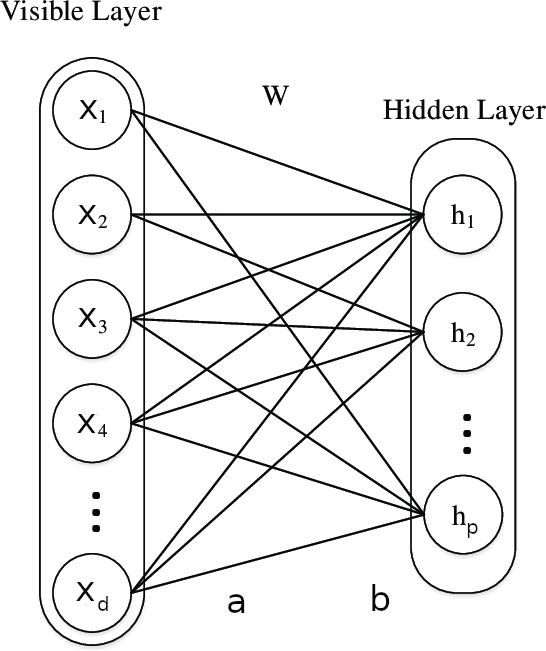

</center>

Une RBM correspond donc à un réseau de neurones contenant 2 couches complètement connectées : chaque node de la couche visible (représenté par les $x_i$) est connecté à tous les nodes de la couche cachée (représentées par les $h_j$). Cependant, les différents $x_i$ et $h_j$ ne sont pas connectés entre eux, ce qui justifie l'attribut "restreint" donné à l'architecture de machine de Boltzmann ci-dessus. <br>
Lors de l'entraînement, les nodes $x_i$ reçoivent les données d'entrée (observations issues de la distribution que l'on souhaite apprendre), à partir desquelles la valeur des nodes de la couche cachée est calculée, puis réutilisée pour calculer la sortie de la RBM au niveau des nodes de la couche visible, à l'aide des paramètres $a$, $b$ et $W$. Les équations explicitant ces calculs sont détaillées par la suite. <br>
L'utilisation principale d'une RBM est donc pour apprendre la distribution de probabilité sous-jacente à un jeu de données et permettre de générer de nouvelles données selon une distribution de probabilité proche de celle apprise. <br>
Les paramètres modifiés lors de l'entraînement sont $a$, $b$ et $W$. La couche cachée est utilisée pour apprendre des caractéristiques de la distribution d'entraînement non observables directement, mais ce sont réellement les poids et biais qui portent l'information apprise à chaque itération.

## 2.2. Entraînement d'une RBM

Une RBM étant un cas particulier de modèle à énergie, on peut écrire la densité de probabilité que l'on cherche à apprendre sous la forme suivante :
$$ p_{\theta}(x, h) = \dfrac{\mathrm{e}^{-E_{\theta}(x, h)}}{Z_{\theta}} \;\;\text{  avec $Z_{\theta} = \int \int \mathrm{e}^{-E_{\theta}(x, h)} dx dh$}$$

Même avec des images de petite taille, 28px x 28px par exemple, $Z_{\theta}$ n'est pas calculable car $d$ devient trop grand - 284 dans l'exemple des images du MNIST donc card(x) = $2^{284}$ $\rightarrow$ saturation de la mémoire). En revanche, $p_{\theta}(h |x)$ et $p_{\theta}(x |h)$ sont calculables! <br>


### 2.2.1 Calcul des probabilités conditionnelles

D'après le théorème de Bayes, $p(A|B)p(B) = p(A \cap B)$. D'où, <br>
$
\begin{align*}
p(h|x) = \frac{p(x,h)}{p(x)} = \frac{p(x,h)}{\sum_{h' \in \{0,1\}^p} p(x, h')} &= \frac{\mathrm{e}^{-E_{\theta}(x, h)}}{Z_{\theta} \sum_{h' \in \{0,1\}^p} \frac{\mathrm{e}^{-E_{\theta}(x, h')}}{Z_{\theta}}} \\
& = \frac{\mathrm{e}^{-E_{\theta}(x, h)}}{\sum_{h' \in \{0,1\}^p} \mathrm{e}^{-E_{\theta}(x, h')}} \\
& = \frac{ \mathrm{e}^{ h^\intercal W x  +a^\intercal x + b^\intercal h} }{\sum_{h' \in \{0,1\}^p} \mathrm{e}^{ h'^\intercal W x  +a^\intercal x + b^\intercal h'}} \\
& = \frac{ \mathrm{e}^{ h^\intercal W x + b^\intercal h} }{\sum_{h' \in \{0,1\}^p} \mathrm{e}^{ h'^\intercal W x + b^\intercal h'}}
\end{align*}
$

Or
$$h^\intercal W x + b^\intercal h = \sum^p_{j=1} h_j W_jx + b_jh_j$$
D'où, <br>
$
\begin{align*}
p(h|x) = \frac{ \prod^p_{j=1} \mathrm{e}^{ h_j W_jx + b_jh_j} }{\sum_{h' \in \{0,1\}^p} \prod^p_{j=1} \mathrm{e}^{ h'_j W_jx + b_jh'_j}} &= \frac{ \prod^p_{j=1} \mathrm{e}^{ h_j W_jx + b_jh_j} }{\prod^p_{j=1} \sum_{h' \in \{0,1\}^p} \mathrm{e}^{ h'_j W_jx + b_jh'_j}} \\
&= \prod^p_{j=1} \frac{\mathrm{e}^{ h_j W_jx + b_jh_j}}{ 1 + \mathrm{e}^{ W_jx + b_j}} && \text{1 pour $h'=0$, $\mathrm{e}^{ W_jx + b_j}$ pour $h'=1$} \\
&= \prod^p_{j=1} p(h_j|x) && \text{ car l'expression s'apparente à une probabilité : le dénominateur est la somme des 2 possibilités pour h}\\
\end{align*}
$

Avec cette notation, <br>
$
\begin{align*}
p(h_j = 1|x) &= \frac{\mathrm{e}^{ h_j W_jx + b_jh_j}. \mathrm{e}^{ -W_jx - b_j}}{(1 + \mathrm{e}^{ W_jx + b_j}) .\mathrm{e}^{ -W_jx - b_j}}\\
&= \frac{1}{\mathrm{e}^{ -W_jx - b_j}} \\
&= sigmoid(W_jx + b_j) && \text{(car $h_j=1$)}
\end{align*}
$

De façon similaire, on peut calculer $p(x|h)$.

<u>Résultats </u>:
$$
\begin{cases}
  \boxed{p(h_j = 1|x) = sigmoid(W_jx + b_j) \\
  p(x_i = 1|h) = sigmoid(a_i + h^\intercal W_i)}
\end{cases}
$$
avec $p(h|x) = \prod^p_{j=1} p(h_j|x)$ et $p(x|h) = \prod^d_{i=1} p(x_i|h)$

Connaissant un $x$, il nous est donc possible de connaître un $h$, et connaissant ce $h$ il nous est possible de connaître un nouveau $x$.

### 2.2.2 Calcul de la fonction d'énergie
$
\begin{align*}
p_{\theta}(x) &= \sum_{h' \in \{0, 1\}^p} p_{\theta}(x, h') \\
&= \frac{\sum_{h' \in \{0, 1\}^p} \mathrm{e}^{ -E_{\theta}(x, h')}}{Z_{\theta}} \\
&= \frac{\sum_{h' \in \{0, 1\}^p} \mathrm{e}^{ h'^\intercal Wx + a^\intercal x + b^\intercal h'}}{Z_{\theta}} \\
&= \mathrm{e}^{a^\intercal x} \frac{\sum_{h' \in \{0, 1\}^p} \mathrm{e}^{ h'^\intercal Wx + b^\intercal h'}}{Z_{\theta}} \\
&= \frac{ \mathrm{e}^{a^\intercal x} \mathrm{e}^{\sum^p_{j=1} log(1+ \mathrm{e}^{ W_jx + b_j})}} { Z_{\theta} }
\end{align*}
$

Cette distribution de probabilité dépend toujours de $Z_{\theta}$ et n'est toujours pas calculable. <br>
En revanche, par analogie avec la définition de $p_{\theta}$, on a à présent : $$ \mathrm{e}^{-E_{\theta}(x)} = \mathrm{e}^{a^\intercal x} \mathrm{e}^{\sum^p_{j=1} log(1+ \mathrm{e}^{ W_jx + b_j}}$$ i.e.
$$ \boxed{E_{\theta}(x) = -(a^\intercal x + \sum^p_{j=1} log(1+ \mathrm{e}^{ W_jx + b_j}))} \;\text{(2)} $$ 

### 2.2.3 Définition d'une fonction de perte 

En reprenant l'équation (1) de la log vraisemblance calculée dans le cas EBM général, on a :
$$\nabla_{\theta}log(p_{\theta}(\mathcal{D})) = N \mathbb{E}_{p_{\theta}}[\nabla_{\theta} E_{\theta}(x)] - \sum^N_{i=1} \nabla_{\theta} E_{\theta}(x_i) $$

L'espérance dépend également de $Z_{\theta}$ et ne peut donc pas être calculée. On peut en revanche l'approximer grâce à la méthode MCMC (Markov-Chain MonteCarlo), dont l'équation générale de l'espérance est :
$$ \underset{x \sim q}{\mathbb{E}}[f(x)] = \int_{x \in Ω} q(x) f(x) dx \sim \frac{1}{N} \sum^n_1 f(x_i) \text{ avec $x_i \sim q$} $$

Ainsi, avec $\tilde{x_i}$ échantillon obtenu via échantilloneur de Gibbs et $M$ le nombre d'échantillons:
$$ \nabla_{\theta}log(p_{\theta}(\mathcal{D})) = - \sum^N_{i=1} \nabla_{\theta}E_{\theta}(x_i) + \frac{N}{M} \sum^M_{i=1} \nabla_{\theta} E_{\theta}(\tilde{x_i})$$
i.e. $$ \nabla_{\theta}log(p_{\theta}(\mathcal{D})) = \nabla_{\theta} (- \sum^N_{i=1} E_{\theta}(x_i) + \frac{N}{M} \sum^M_{i=1} E_{\theta}(\tilde{x_i}))$$

Maximiser la log vraisemblance revient à minimiser $-log(p_{\theta}(\mathcal{D}))$. On définit donc notre fonction de perte $\mathcal{L}_{\theta}$ de la manière suivante :
$$ \boxed{\mathcal{L}_{\theta} = \sum^N_{i=1} E_{\theta}(x_i) - \frac{N}{M} \sum^M_{i=1} E_{\theta}(\tilde{x_i})} \;\text{(3)}$$
On cherchera par la suite à entraîner notre modèle en **minimisant** cette perte via descente de gradient. <br>

<u>N.B. </u> : Pour minimiser cette fonction de perte, il est nécessaire de minimiser le 1<sup>er</sup> terme, i.e. l'énergie des observations issues de la distribution de probabilité d'apprentissage, et de maximiser le second, i.e. l'énergie des échantillons obtenus via échantillonneur de Gibbs. L'entraînement de la RBM permet donc simultanément d'abaisser l'énergie des observations et d'augmenter l'énergie de toute autre donnée générée. On retrouve ainsi bien le principe de la Constrastive Divergence, qui permet d'inférer une fonction d'énergie faible pour la distribution d'apprentissage et élevée pour toute donnée en dehors de cette distribution.

<br>
Nous avons à présent à notre disposition tous les éléments permettant d'implémenter une RBM en Python.


---

# III - Entraînement d'une RBM sur la base de données MNIST

## 3.1. Fonctions utilisées pour l'implémentation d'une RBM

Cette section regroupe l'ensemble des fonctions utilisées pour la réalisation de ce rapport. Les sections suivantes seront uniquement constituées de tests et d'analyses de RBM générées à partir de ces fonctions.

In [141]:
# Import des librairies utiles
from keras.datasets import mnist
import math
import matplotlib.pyplot as plt
import numpy as np
import torch
from datetime import datetime

In [55]:
class RBM:
  """ Définition de la RBM, qui sera utilisée pour instancer des RBM 
  et les entraîner """
  def __init__(self, d, p):
    """ Le constructeur prend en entrée la dimension de la couche visible d 
    et la dimension de la couche cachée p """
    self.d = d
    self.p = p
    # Initialisation des poids
    self.W = torch.rand(p, d) * 0.001 # pondération 0.001 trouvée empiriquement
    self.a = torch.zeros(1, d)
    self.b = torch.zeros(1, p)
    # Nécessaire pour permettre la mise à jour des valeurs via descente de gradient
    self.W.requires_grad = True
    self.a.requires_grad = True
    self.b.requires_grad = True

  def cache_visible(self, x):
    """ Fonction qui calcule p(h|x)
    Prend en entrée un batch de dimension (batch_size, d)
    Renvoie un tensor de dimension (batch_size, p)"""
    return torch.sigmoid(x @ self.W.T + self.b)

  def visible_cache(self, h):
    """ Fonction qui calcule p(x|h)
    Prend en entrée un batch de dimension (batch_size, p)
    Renvoie un tensor de dimension (batch_size, d)"""
    return torch.sigmoid(h @ self.W + self.a)

  def energie(self, x):
    """ Fonction qui calcule l'énergie à partir de x
    Prend en entrée un batch de dimension (batch_size, d)
    Renvoie un vecteur 1D de taille (batch_size) : une valeur par observation"""
    bias = self.a @ x.T
    log_somme = torch.sum(torch.nn.functional.softplus(x @ self.W.T + self.b), dim=1)
    return - bias - log_somme

  def sample(self, nb_sample, iteration=100):
    """ Fonction qui génère des échantillons via la méthode d'échantillonnage de Gibbs 
    Prend en entrée le nombre d'échantillons à générer (égal au nombre d'éléments dans un batch par la suite)
    et le nombre d'itérations à effectuer pour générer les échantillons
    Renvoie un échantillon de taille (batch_size, d) : même dimension que x"""
    x = torch.rand(nb_sample, self.d)
    for k in range(iteration):
        h = torch.bernoulli(self.cache_visible(x))
        x = torch.bernoulli(self.visible_cache(h))
    return x

  def loss(self, x, x_tilde):
    """ Fonction qui calcule la perte à partir de x et d'un échantillon généré via la fonction sample
    Prend en entrée x de dimension (batch_size, d), et un échantillon généré via sample, de taille (batch_size, d)
    Renvoie la perte, un nombre scalaire, en sortie"""
    return torch.sum(self.energie(x)) - (x.shape[0] / x_tilde.shape[0]) * torch.sum(self.energie(x_tilde))

  def train(self, target_samples, batch_size, iter_sample, learning_rate, epoch):
    """ Fonction utilisée pour l'entraînement
    Inputs : 
      target_samples : jeu d'entraînement - de dimension (60000, d) lorsque l'ensemble du jeu d'entraînement est utilisé
      batch_size : taille d'un batch = nombre d'observations traitées en parallèle. La mémoire requise pour entraîner tout
                   le jeu d'entraînement en un seul batch est très élevé, ce qui impose de découper le jeu d'entraînement en batchs
                   et de les utiliser de manière séquentielle pour entraîner le modéle
      iter_sample : nombre d'itérations pour générer les échantillons via la fonction sample
      learning_rate : taux d'apprentissage, utilisé pendant la descente de gradient
      epoch : nombre d'itérations à effectuer sur le jeu d'entraînement ENTIER
    Outputs :
      loss_batch : liste contenant la valeur de perte, calculée à chaque batch. de dimension (nb_batch * epoch)
      mean_loss : liste contenant la valeur de la valeur moyenne de perte, calculée à chaque batch
      mses : liste contenant la MSE calculée à chaque epoch entre une image d'entraînement, et l'image correspondante
      générée via la RBM"""
    dataset = torch.utils.data.TensorDataset(target_samples)
    # Optimisateur utilisé : Adam -> le learning_rate peut être différent pour chaque feature/pixel
    optim = torch.optim.Adam([self.a, self.b, self.W], lr=learning_rate)
    loss_batch, mean_loss, mses = [], [], []
    for t in range(epoch):
        dataloader = torch.utils.data.DataLoader(dataset, batch_size, shuffle=True)
        for batch in dataloader:
            x = batch[0]
            # Génération des échantillons via échantillonneur de Gibbs
            x_tilde = self.sample(x.shape[0], iter_sample)
            # Calcul de la perte
            loss = self.loss(x, x_tilde)
            loss_batch.append(loss.detach().numpy())
            mean_loss.append(np.mean(loss_batch))
            # Calcul du gradient de la perte
            optim.zero_grad()
            # Mise à jour des attributs de a, b et W
            loss.backward()
            optim.step()
        mseloss = torch.nn.functional.mse_loss(x, self.visible_cache(self.cache_visible(x)))
        mses.append(mseloss)
        print(f"{datetime.now().strftime('%H:%M:%S')} : Epoch : {t} - MSE : {mseloss}")
    return loss_batch, mean_loss, mses

In [57]:
def convert_img_to_binary(img):
  """ Fonction utilisée pour convertir la valeur des images MNIST
  Par défaut, les pixels de ces images ont valeur dans l'intervalle [0, 255]
  mais l'algorithme de notre RBM ne fonctionne qu'avec des valeurs dans {0, 1}
  Input : image (array numpy)
  Output : image de même dimension (array numpy)"""
  X = np.zeros(img.shape)
  # Arbitrairement, toutes les valeurs dont l'intensité est plus grande que la
  # moyenne sont converties en 1, les autres en 0
  X[img > 128] = 1
  X[img < 129] = 0
  return X

In [58]:
def convert_binary_to_grayscale(img):
  """ Fonction pour reconstituer une image avec pixels dans [0, 255]
  après génération par la RBM 
  Input : image avec valeurs dans {0, 1} (tensor torch)
  Output : image de même dimension avec valeurs dans [0, 255] (array numpy)"""
  # Pour améliorer le contraste, toutes les valeurs inférieures à 0.3 sont
  # mises à 0, celles supérieurs à 0.6 sont mises à 255
  img[img < 0.3] = 0
  img[img >= 0.6] = 1
  return np.floor(img.detach().numpy() * 255)

In [59]:
def reconstruct_img(img, rbm):
  """ Fonction générant une image via la RBM à partir d'une image de test
  Inputs : image (array numpy) et objet rbm instancié (et de préférence entraîné)
  Output : image de même dimension (array numpy)"""
  img_bin = convert_img_to_binary(img)
  img_flat = torch.tensor(img_bin.reshape(1, d)).float()
  tensor_rec = rbm.visible_cache(rbm.cache_visible(img_flat)).reshape(28, 28)
  return convert_binary_to_grayscale(tensor_rec)

In [60]:
def score_rbm(rbm):
  """ Fonction utilisée pour évaluer une RBM entraînée.
  Calcule la MSE entre chaque image du dataset de test, et l'image générée via la RBM à partir de cette image
  Renvoie la moyenne de ces MSE (scalaire)"""
  mses = []
  for i in range(x_test.shape[0]):
    test = x_test[i]
    test_rec = reconstruct_img(test, rbm)
    mses.append(torch.nn.functional.mse_loss(torch.tensor(test).float(), torch.tensor(test_rec).float()))
  return np.mean(mses)

In [61]:
def save_rbm(rbm, filename):
  """ Enregistre les poids (attributs a, b et W) d'une RBM dans un fichier .npy persistant
  Inputs : object rbm instancé, nom de fichier
  Outputs : créé 3 fichiers sur le disque """
  with open(f"{filename}_a.npy", "wb") as f:
    np.save(f, rbm.a.detach().numpy())
  with open(f"{filename}_b.npy", "wb") as f:
    np.save(f, rbm.b.detach().numpy())
  with open(f"{filename}_W.npy", "wb") as f:
    np.save(f, rbm.W.detach().numpy())

In [62]:
def load_rbm(filename):
  """ Charge un RBM depuis 3 fichiers .npy contenant les attributs a, b et W d'une RBM
  Input : nom de fichier
  Output : rbm instancié avec les paramètres contenus dans les fichiers """
  a = np.load(f"{filename}_a.npy")
  b = np.load(f"{filename}_b.npy")
  W = np.load(f"{filename}_W.npy")
  p = b.shape[1]
  rbm = RBM(d, p)
  rbm.a, rbm.b, rbm.W = a, b, W
  return rbm

In [71]:
# d est la dimension de la couche visible, utilisée ici en tant que variable globale car donnée du problème
d = 784
# Chargement des données MNIST et répartition en jeux d'entraînement et de test
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [64]:
# Chargement des rbm entraînés pour tester l'effet du nombre de hidden units (dossier hidden_units requis)
hidden = [10, 20, 30, 50, 100, 150, 200, 300, 500, 1000]
rbm_hiddens = {}
for h in hidden:
  rbm_hiddens[h] = load_rbm(f"hidden_units/rbm_full_{h}hidden_25epoch")

In [65]:
# Chargement des rbm entraînés pour tester l'effet du nombre de samples Gibbs( dossier iter_samples requis)
iter_samples  = [1, 10, 20, 30, 40, 50, 60, 70, 100, 120, 150]
rbm_iter = {}
for i in iter_samples:
  rbm_iter[i] = load_rbm(f"iter_samples/rbm_150hidden_{i}is")

In [66]:
# Chargement des rbm entraînés pour tester l'effet du learning_rate (dossier learning_rates requis)
learning_rates = [0.00001, 0.0001, 0.0003, 0.001, 0.003, 0.1, 0.3, 1, 3, 10, 30, 100, 300]
rbm_lr = {}
for lr in learning_rates:
  rbm_lr[lr] = load_rbm(f"learning_rates/rbm_150hidden_{lr}")

In [67]:
# Chargement des rbm entraînés pour tester l'effet du batch_size (dossier batch_sizes requis)
batch_sizes = [5000, 3000, 1500, 1000, 500, 300, 100, 50, 30, 10, 1]
rbm_bs = {}
for bs in batch_sizes:
  rbm_bs[bs] = load_rbm(f"batch_sizes/rbm_150hidden_{bs}bs")

In [ ]:
# Exmple de code pour le training, ne pas lancer tel quel car prend du temps
p = 100
batch_size, iter_sample, learning_rate, epoch = 1500, 100, 0.01, 25
X = convert_img_to_binary(x_train)
data = torch.tensor(X.reshape(X.shape[0], d)).float()
print(f"{datetime.now().strftime('%H:%M:%S')} : {data.shape}")
rbm = RBM(d, p)
_, _, _, = rbm.train(data, batch_size, iter_sample, learning_rate, epoch)

15:47:17 : torch.Size([60000, 784])
15:51:18 : Epoch : 0 - MSE : 0.14550010859966278
15:55:16 : Epoch : 1 - MSE : 0.1268850713968277
15:59:08 : Epoch : 2 - MSE : 0.11548280715942383
16:02:55 : Epoch : 3 - MSE : 0.10267091542482376
16:06:38 : Epoch : 4 - MSE : 0.08931946009397507
16:10:20 : Epoch : 5 - MSE : 0.08092841506004333
16:14:20 : Epoch : 6 - MSE : 0.07894077152013779
16:18:13 : Epoch : 7 - MSE : 0.07372323423624039
16:22:07 : Epoch : 8 - MSE : 0.06984354555606842
16:25:51 : Epoch : 9 - MSE : 0.06627074629068375
16:29:30 : Epoch : 10 - MSE : 0.06227791681885719
16:33:09 : Epoch : 11 - MSE : 0.05931805446743965
16:36:47 : Epoch : 12 - MSE : 0.056817736476659775
16:40:23 : Epoch : 13 - MSE : 0.05476607754826546
16:44:01 : Epoch : 14 - MSE : 0.052939239889383316
16:47:39 : Epoch : 15 - MSE : 0.05098867788910866
16:51:17 : Epoch : 16 - MSE : 0.050245556980371475
16:54:55 : Epoch : 17 - MSE : 0.04790731891989708
16:58:30 : Epoch : 18 - MSE : 0.046763692051172256
17:02:07 : Epoch : 19

## 3.2. Entraînement d'un premier RBM

Pour valider l'implémentation de la RBM, j'ai décidé d'entraîner un RBM sans me préoccuper des paramètres, en restreignant le nombre d'epoch pour avoir un résultat rapide. <br>
Ce RBM n'est entraîné que sur des images contenant des chiffres `6`.

In [72]:
p = 150
(x_train, y_train), (x_test, y_test) = mnist.load_data()
batch_size, iter_sample, learning_rate, epoch = 1000, 100, 0.01, 5
chiffre = 6
x_train_6 = x_train[y_train == chiffre]
X = convert_img_to_binary(x_train_6)
data = torch.tensor(X.reshape(X.shape[0], d)).float()
print(f"{datetime.now().strftime('%H:%M:%S')} : {data.shape}")
rbm6 = RBM(d, p)
_, _, _ = rbm6.train(data, batch_size, iter_sample, learning_rate, epoch)

20:46:14 : torch.Size([5918, 784])
20:46:56 : Epoch : 0 - MSE : 0.13513191044330597
20:47:30 : Epoch : 1 - MSE : 0.13345195353031158
20:48:02 : Epoch : 2 - MSE : 0.11817572265863419
20:48:34 : Epoch : 3 - MSE : 0.10988584905862808
20:49:17 : Epoch : 4 - MSE : 0.10367726534605026


Test de ce premier RBM : génération de quelques images à partir du jeu de test, et aperçu de la distrubtion apprise via la fonction sample

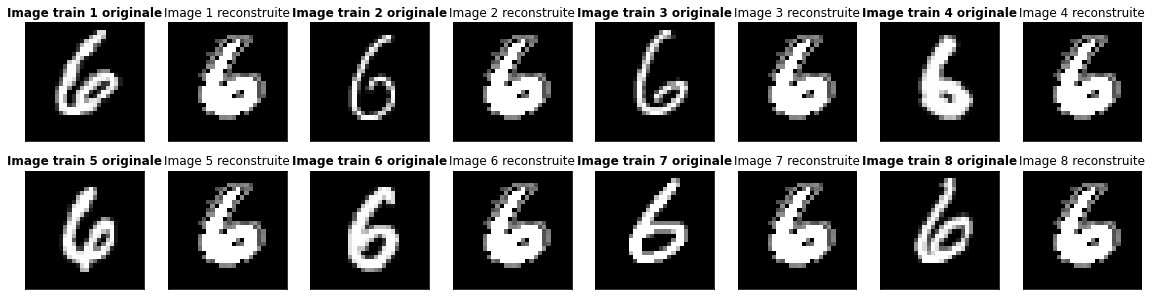

In [95]:
plt.rcParams['figure.figsize'] = [20, 5]
fig, axs = plt.subplots(2, 8)
for i in range(8):
  X = x_train_6[i]
  axs[math.floor(i/4), 2*i % 8].imshow(X, cmap="gray")
  axs[math.floor(i/4), 2*i % 8].grid(False)
  axs[math.floor(i/4), 2*i % 8].set_xticks([])
  axs[math.floor(i/4), 2*i % 8].set_yticks([])
  axs[math.floor(i/4), 2*i % 8].set_title(f"Image train {i+1} originale", fontweight="bold")
  img_rec = reconstruct_img(X, rbm6)
  axs[math.floor(i/4), (2*i+1) % 8].imshow(img_rec, cmap="gray")
  axs[math.floor(i/4), (2*i+1) % 8].grid(False)
  axs[math.floor(i/4), (2*i+1) % 8].set_xticks([])
  axs[math.floor(i/4), (2*i+1) % 8].set_yticks([])
  axs[math.floor(i/4), (2*i+1) % 8].set_title(f"Image {i+1} reconstruite")
plt.show()

Le modèle génère bien des 6 comme attendu ! <br>
... mais ils sont tous similaires, et n'ont pas l'air de dépendre de l'image initiale

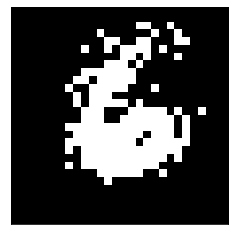

In [88]:
plt.rcParams['figure.figsize'] = [8, 4]
new_img = rbm6.sample(1, 100).reshape(28,28)
plt.imshow(new_img.detach().numpy(), cmap="gray")
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.show()

L'image générée à partir d'un échantillon Gibbs après 100 itérations ressemble bien à 6. <br>
On teste également la génération d'images à partir d'images d'autres chiffres pour vérifier si les  suspicions se confirment.

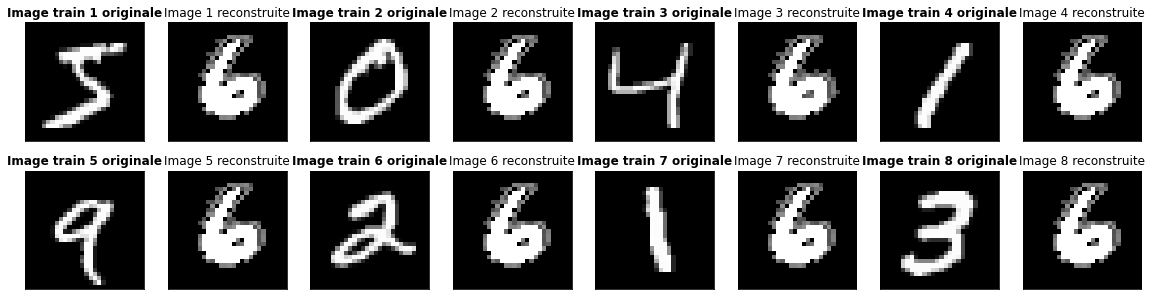

In [105]:
plt.rcParams['figure.figsize'] = [20, 5]
fig, axs = plt.subplots(2, 8)
for i in range(8):
  X = x_train[i]
  axs[math.floor(i/4), 2*i % 8].imshow(X, cmap="gray")
  axs[math.floor(i/4), 2*i % 8].grid(False)
  axs[math.floor(i/4), 2*i % 8].set_xticks([])
  axs[math.floor(i/4), 2*i % 8].set_yticks([])
  axs[math.floor(i/4), 2*i % 8].set_title(f"Image train {i+1} originale", fontweight="bold")
  img_rec = reconstruct_img(X, rbm6)
  axs[math.floor(i/4), (2*i+1) % 8].imshow(img_rec, cmap="gray")
  axs[math.floor(i/4), (2*i+1) % 8].grid(False)
  axs[math.floor(i/4), (2*i+1) % 8].set_xticks([])
  axs[math.floor(i/4), (2*i+1) % 8].set_yticks([])
  axs[math.floor(i/4), (2*i+1) % 8].set_title(f"Image {i+1} reconstruite")
plt.show()

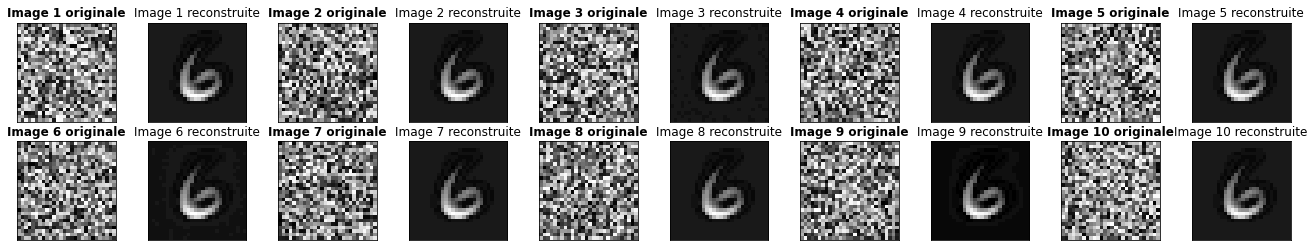

In [108]:
plt.rcParams['figure.figsize'] = [23, 4]
fig, axs = plt.subplots(2, 10)
np.random.seed(42)
for i in range(10):
  rand = np.random.randint(0, high=255, size=(28,28), dtype=int)
  img_rec = reconstruct_img(rand, rbm6)
  axs[math.floor(i/5), 2*i % 10].imshow(rand, cmap="gray")
  axs[math.floor(i/5), 2*i % 10].grid(False)
  axs[math.floor(i/5), 2*i % 10].set_xticks([])
  axs[math.floor(i/5), 2*i % 10].set_yticks([])
  axs[math.floor(i/5), 2*i % 10].set_title(f"Image {i+1} originale", fontweight="bold")
  axs[math.floor(i/5), (2*i+1) % 10].imshow(img_rec, cmap="gray")
  axs[math.floor(i/5), (2*i+1) % 10].grid(False)
  axs[math.floor(i/5), (2*i+1) % 10].set_xticks([])
  axs[math.floor(i/5), (2*i+1) % 10].set_yticks([])
  axs[math.floor(i/5), (2*i+1) % 10].set_title(f"Image {i+1} reconstruite")

La RBM entraînée semble génère donc pratiquement toujours le même `6`, même à partir de bruit gaussien (bien qu'un peu dégradé). <br>
On a ainsi tout de même pû valider le bon fonctionnement de l'algorithme, et soulevé l'importance de choisir des paramètres adaptés pour réaliser l'entraînement. Le modèle a ici bien appris la distribution des `6` (énergie basse pour les points représentant un 6), mais l'énergie n'est pas élevée pour les points en dehors de la distribution d'entraînement puisque toute image d'entrée génère le même 6 en sortie. <br>
A présent que le fonctionnement de l'algorithme est validé, j'ai décidé de traiter un cas un peu plus intéressant : entraîner une RBM pour générer des images de n'importe quel chiffre (et donc trouver les paramètres adaptés à cet entraînement).

## 3.3. Etude de l'impact du nombre de hidden units

Le 1er paramètre auquel je me suis intéressé est le nombre de nodes dans la couche cachée. J'ai entraîné un RBM sur l'ensemble du jeu d'entraînement avec 1000 hidden units pour vérifier si cela permettait bien de capturer l'ensemble des features nécessaires pour distinguer les 10 chiffres. <br>
Les images reconstruites via ce RBM à partir des 12 premières images du jeu d'entraînement du MNIST avec iter_sample=100, batch_size=1500, epoch=25, learning_rate=0.01 sont affichées ci-dessous

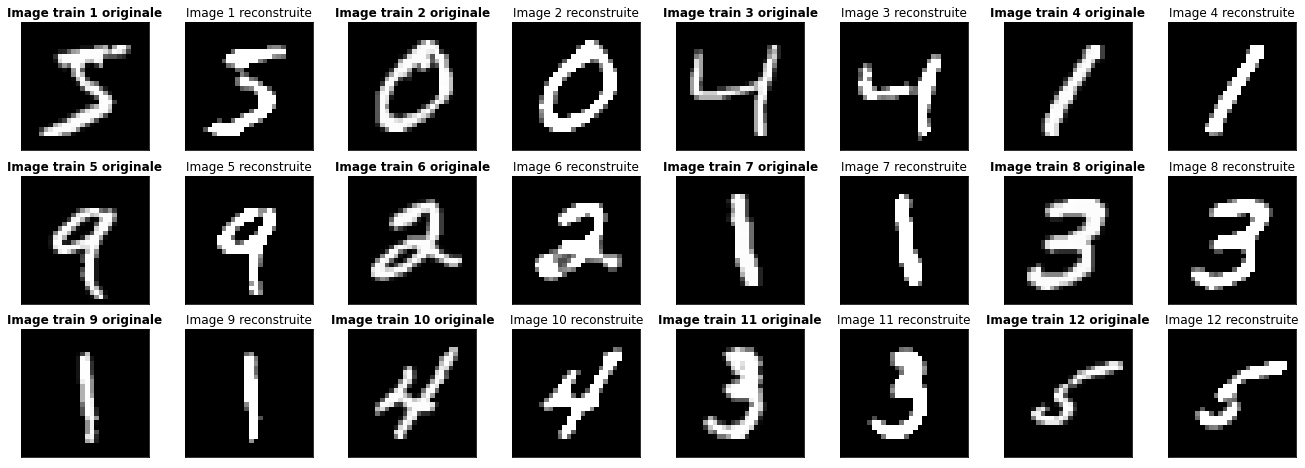

In [115]:
plt.rcParams['figure.figsize'] = [23, 8]
fig, axs = plt.subplots(3, 8)
for i in range(12):
  X = x_train[i]
  axs[math.floor(i/4), 2*i % 8].imshow(X, cmap="gray")
  axs[math.floor(i/4), 2*i % 8].grid(False)
  axs[math.floor(i/4), 2*i % 8].set_xticks([])
  axs[math.floor(i/4), 2*i % 8].set_yticks([])
  axs[math.floor(i/4), 2*i % 8].set_title(f"Image train {i+1} originale", fontweight="bold")
  img_rec = reconstruct_img(X, rbm_hiddens[1000])
  axs[math.floor(i/4), (2*i+1) % 8].imshow(img_rec, cmap="gray")
  axs[math.floor(i/4), (2*i+1) % 8].grid(False)
  axs[math.floor(i/4), (2*i+1) % 8].set_xticks([])
  axs[math.floor(i/4), (2*i+1) % 8].set_yticks([])
  axs[math.floor(i/4), (2*i+1) % 8].set_title(f"Image {i+1} reconstruite")
plt.show()

Les images reconstruites sont très fidèles aux originales ! Cependant, elles ont été générées sur des images issues du jeu d'entraînement, i.e. images pour lesquelles le modèle a explicitement été entraîné. <br>
Pour mesurer les performances du modèle entraîné, il est plus intéressant de lui fournir en entrée des images du jeu de test, que le modèle n'a encore jamais vu. Ci-dessous sont affichées les images reconstruites à partir des 12 premières images du jeu de test, avec le même modèle.

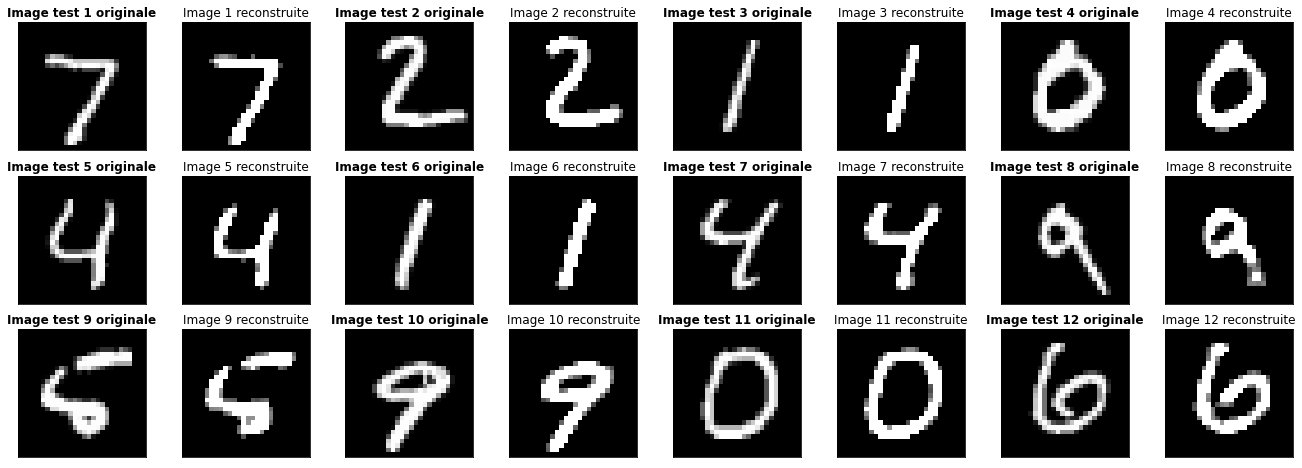

In [116]:
plt.rcParams['figure.figsize'] = [23, 8]
fig, axs = plt.subplots(3, 8)
for i in range(12):
  X = x_test[i]
  axs[math.floor(i/4), 2*i % 8].imshow(X, cmap="gray")
  axs[math.floor(i/4), 2*i % 8].grid(False)
  axs[math.floor(i/4), 2*i % 8].set_xticks([])
  axs[math.floor(i/4), 2*i % 8].set_yticks([])
  axs[math.floor(i/4), 2*i % 8].set_title(f"Image test {i+1} originale", fontweight="bold")
  img_rec = reconstruct_img(X, rbm_hiddens[1000])
  axs[math.floor(i/4), (2*i+1) % 8].imshow(img_rec, cmap="gray")
  axs[math.floor(i/4), (2*i+1) % 8].grid(False)
  axs[math.floor(i/4), (2*i+1) % 8].set_xticks([])
  axs[math.floor(i/4), (2*i+1) % 8].set_yticks([])
  axs[math.floor(i/4), (2*i+1) % 8].set_title(f"Image {i+1} reconstruite")
plt.show()

Les images sont également très fidèles : il semble donc que le modèle n'a pas overfitté la distribution d'entraînement. Le RBM entraîné semble donc générer des chiffres corrects de manière cohérente.<br>
Cependant, entraîner un modèle contenant 1000 hidden units est relativement long. Peut-être est-il possible de diminuer ce nombre de nodes sans sacrifier la qualité de la reconstruction? <br>
Pour vérifier cela, j'ai entraîné des RBM avec les mêmes paramètres, en faisant varier le nombre de nodes dans la couche cachée entre 10 et 1000. Les paramètres de ces RBM sont stockées dans les fichiers du dossier "hidden_units". <br>
Ci-dessous sont affichés les images générées via certains RBM pour 6 images du jeu de test.

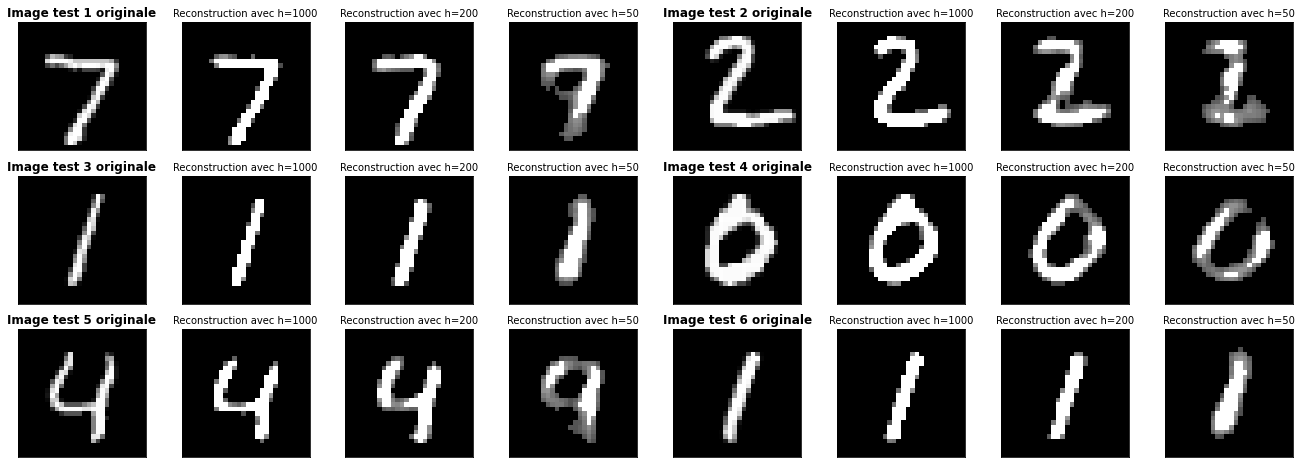

In [120]:
plt.rcParams['figure.figsize'] = [23, 8]
fig, axs = plt.subplots(3, 8)
for i in range(6):
  X = x_test[i]
  axs[math.floor(i/2), 4*i % 8].imshow(X, cmap="gray")
  axs[math.floor(i/2), 4*i % 8].grid(False)
  axs[math.floor(i/2), 4*i % 8].set_xticks([])
  axs[math.floor(i/2), 4*i % 8].set_yticks([])
  axs[math.floor(i/2), 4*i % 8].set_title(f"Image test {i+1} originale", fontweight="bold")

  img_rec_1000 = reconstruct_img(X, rbm_hiddens[1000])
  axs[math.floor(i/2), (4*i+1) % 8].imshow(img_rec_1000, cmap="gray")
  axs[math.floor(i/2), (4*i+1) % 8].grid(False)
  axs[math.floor(i/2), (4*i+1) % 8].set_xticks([])
  axs[math.floor(i/2), (4*i+1) % 8].set_yticks([])
  axs[math.floor(i/2), (4*i+1) % 8].set_title(f"Reconstruction avec h=1000", fontsize=10)

  img_rec_100 = reconstruct_img(X, rbm_hiddens[100])
  axs[math.floor(i/2), (4*i+2) % 8].imshow(img_rec_100, cmap="gray")
  axs[math.floor(i/2), (4*i+2) % 8].grid(False)
  axs[math.floor(i/2), (4*i+2) % 8].set_xticks([])
  axs[math.floor(i/2), (4*i+2) % 8].set_yticks([])
  axs[math.floor(i/2), (4*i+2) % 8].set_title(f"Reconstruction avec h=200", fontsize=10)

  img_rec_10 = reconstruct_img(X, rbm_hiddens[50])
  axs[math.floor(i/2), (4*i+3) % 8].imshow(img_rec_10, cmap="gray")
  axs[math.floor(i/2), (4*i+3) % 8].grid(False)
  axs[math.floor(i/2), (4*i+3) % 8].set_xticks([])
  axs[math.floor(i/2), (4*i+3) % 8].set_yticks([])
  axs[math.floor(i/2), (4*i+3) % 8].set_title(f"Reconstruction avec h=50", fontsize=10)
plt.show()

On remarque que les chiffres générés avec 200 hidden nodes sont un peu plus flous que ceux générés avec 1000 hidden nodes, mais sont tout de même d'une qualité correcte. En revanche, les résultats avec h=50 ne sont pas satisfaisants pour tous les chiffres ! <br>
Afin de juger de la qualité des images générées de manière un peu plus objective et scalable, j'ai décidé de créer une fonction de scoring de chaque RBM (cf. fonction score_rbm créée plus haut). <br>
Cette fonction calcule la MSE entre chaque image du jeu de test, et une image générée via RBM à partir de cette image, et renvoie la moyenne obtenue. **Une RBM bien entraînée doit donc obtenir un score bas**. J'utilise ce score dans la suite du TP pour mesurer la qualité des images générées en fonction des différents paramètres. Le score obtenu en fonction du nombre de nodes et affiché ci-dessous.

In [16]:
hidden = [10, 20, 30, 50, 100, 150, 200, 300, 500, 1000]
score = []
for h in hidden:
  score.append(score_rbm(rbm_hiddens[h]))
  print(f"{datetime.now().strftime('%H:%M:%S')} : Score : {score}")

18:25:02 : Score : [4854.197]
18:25:19 : Score : [4854.197, 4880.528]
18:25:35 : Score : [4854.197, 4880.528, 4866.4243]
18:25:52 : Score : [4854.197, 4880.528, 4866.4243, 3476.0627]
18:26:10 : Score : [4854.197, 4880.528, 4866.4243, 3476.0627, 2076.8213]
18:26:27 : Score : [4854.197, 4880.528, 4866.4243, 3476.0627, 2076.8213, 1541.9874]
18:26:46 : Score : [4854.197, 4880.528, 4866.4243, 3476.0627, 2076.8213, 1541.9874, 1278.832]
18:27:14 : Score : [4854.197, 4880.528, 4866.4243, 3476.0627, 2076.8213, 1541.9874, 1278.832, 1090.3293]
18:27:43 : Score : [4854.197, 4880.528, 4866.4243, 3476.0627, 2076.8213, 1541.9874, 1278.832, 1090.3293, 996.8335]
18:28:10 : Score : [4854.197, 4880.528, 4866.4243, 3476.0627, 2076.8213, 1541.9874, 1278.832, 1090.3293, 996.8335, 959.2484]


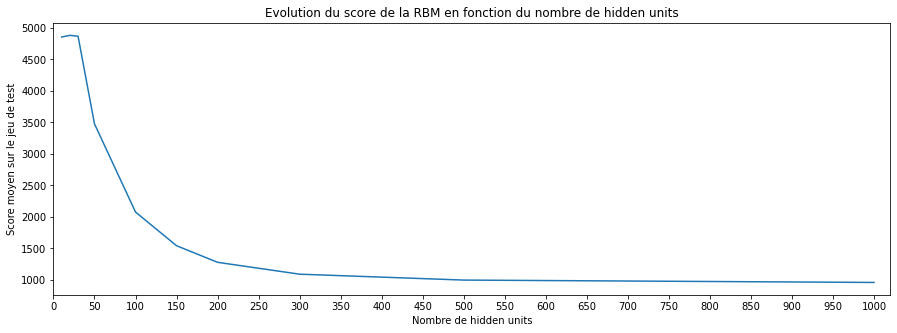

In [33]:
plt.rcParams['figure.figsize'] = [15, 5]
plt.plot(hidden, score)
plt.title("Evolution du score de la RBM en fonction du nombre de hidden units")
plt.xlabel("Nombre de hidden units")
plt.ylabel("Score moyen sur le jeu de test")
plt.xticks(range(0, 1100, 50))
plt.xlim(0, 1020)
plt.show()

On remarque que le score est divisé par environ 5 lorsque le nombre de hidden units passe de 10 à 200, et décroît ensuite peu entre 200 et 1000 hidden units. <br>
Une RBM entraîné avec 1000 hidden units sera donc plus performante que les autres, mais le gain par rapport à une RBM entraînée avec 150 ou 200 hidden units n'est pas énorme. La courbe obtenue via la fonction de scoring semble cohérente avec les observations visuelles, il semble donc raisonnable de continuer à utiliser cette fonction de scoring par la suite.

## 3.4. Etude de l'impact du nombre d'itérations dans la fonction sample (échantillonneur de Gibbs)

Deuxième paramètre étudié : le nombre d'itération dans la fonction sample. De même que précédemment, j'ai généré plusieurs RBM entraîné avec des valeurs du nombre d'itération comprises entre 1 et 150. J'ai fixé le nombre de hidden nodes à 150 et non pas 1000 pour raccourcir le temps d'entraînement. <br>
Le code ci-dessus présente le code utilisé pour l'entraînement, mais le calcul prenant un certain temps, les résultats ont une fois de plus été enregistrés dans des fichier .npy, chargés plus haut dans le notebook. Les résultats obtenus en fonction des différents nombres d'itérations sont présentés ci-dessous

In [ ]:
# Exemple d'entraînement du modèle
x_train_short = x_train[:20000]
p = 150
rbm_list = []
iter_samples  = [1, 10, 20, 30, 40, 50, 60, 70, 100, 120, 150]
for iter_sample in iter_samples:
  print(f"iter_sample : {iter_sample}")
  batch_size, learning_rate, epoch = 1500, 0.05, 8
  X_short = convert_img_to_binary(x_train_short)
  data = torch.tensor(X_short.reshape(X_short.shape[0], d)).float()
  print(f"{datetime.now().strftime('%H:%M:%S')} : {data.shape}")
  rbm_tmp = RBM(d, p)
  rbm_tmp.train(data, batch_size, iter_sample, learning_rate, epoch)
  rbm_list.append(rbm_tmp)

In [35]:
score_iter = []
for i in iter_samples:
  score_iter.append(score_rbm(rbm_iter[i]))
  print(f"{datetime.now().strftime('%H:%M:%S')} : Score : {score_iter}")

18:37:51 : Score : [14557.824]
18:38:10 : Score : [14557.824, 4960.0503]
18:38:29 : Score : [14557.824, 4960.0503, 3822.82]
18:38:49 : Score : [14557.824, 4960.0503, 3822.82, 2406.6353]
18:39:07 : Score : [14557.824, 4960.0503, 3822.82, 2406.6353, 2378.7048]
18:39:34 : Score : [14557.824, 4960.0503, 3822.82, 2406.6353, 2378.7048, 2301.5898]
18:39:54 : Score : [14557.824, 4960.0503, 3822.82, 2406.6353, 2378.7048, 2301.5898, 2220.767]
18:40:12 : Score : [14557.824, 4960.0503, 3822.82, 2406.6353, 2378.7048, 2301.5898, 2220.767, 1979.3408]
18:40:30 : Score : [14557.824, 4960.0503, 3822.82, 2406.6353, 2378.7048, 2301.5898, 2220.767, 1979.3408, 2042.0656]
18:40:48 : Score : [14557.824, 4960.0503, 3822.82, 2406.6353, 2378.7048, 2301.5898, 2220.767, 1979.3408, 2042.0656, 1990.3221]
18:41:06 : Score : [14557.824, 4960.0503, 3822.82, 2406.6353, 2378.7048, 2301.5898, 2220.767, 1979.3408, 2042.0656, 1990.3221, 2117.6404]


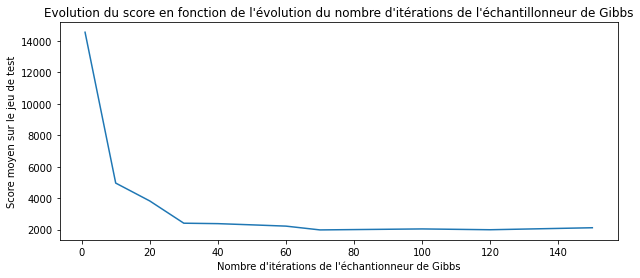

In [125]:
plt.plot(iter_samples, score_iter)
plt.rcParams['figure.figsize'] = [10, 5]
plt.title("Evolution du score en fonction de l'évolution du nombre d'itérations de l'échantillonneur de Gibbs")
plt.xlabel("Nombre d'itérations de l'échantionneur de Gibbs")
plt.ylabel("Score moyen sur le jeu de test")
plt.show()

On remarque sans surprise que le score diminue quand le nombre d'itérations augmente. On remarque en revanche un minimum de score pour k=70, nombre d'itérations à partir duquel le score semble augmenter légèrement. <br>
Pour la suite de l'analyse, j'ai donc utilisé k=70 pour entraîner les différents modèles. <br>
On vérifie au passage la qualité des images générée avec ce paramètre sur des images du jeu de test.

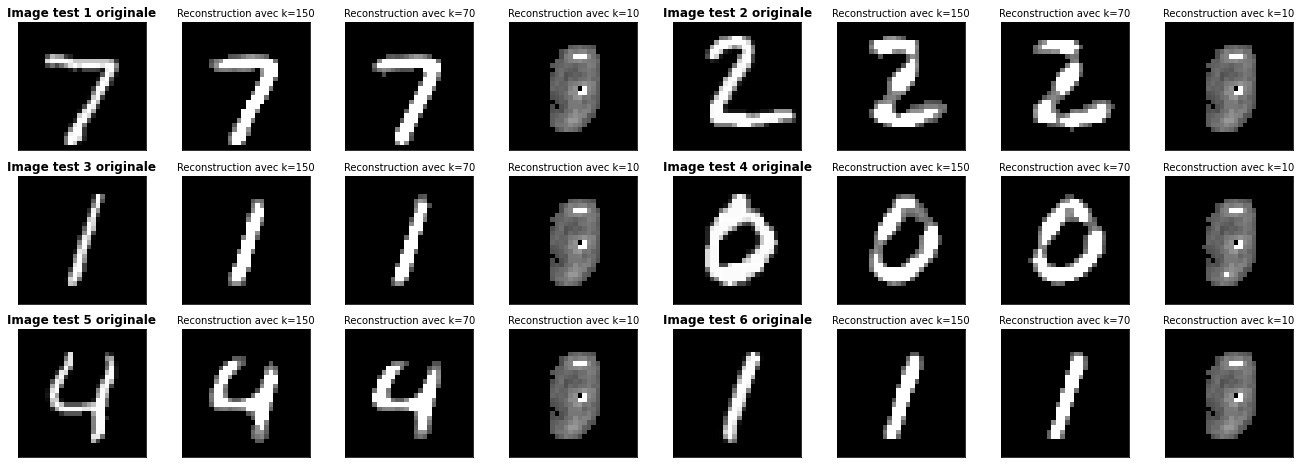

In [132]:
plt.rcParams['figure.figsize'] = [23, 8]
fig, axs = plt.subplots(3, 8)
for i in range(6):
  X = x_test[i]
  axs[math.floor(i/2), 4*i % 8].imshow(X, cmap="gray")
  axs[math.floor(i/2), 4*i % 8].grid(False)
  axs[math.floor(i/2), 4*i % 8].set_xticks([])
  axs[math.floor(i/2), 4*i % 8].set_yticks([])
  axs[math.floor(i/2), 4*i % 8].set_title(f"Image test {i+1} originale", fontweight="bold")

  img_rec_1000 = reconstruct_img(X, rbm_iter[150])
  axs[math.floor(i/2), (4*i+1) % 8].imshow(img_rec_1000, cmap="gray")
  axs[math.floor(i/2), (4*i+1) % 8].grid(False)
  axs[math.floor(i/2), (4*i+1) % 8].set_xticks([])
  axs[math.floor(i/2), (4*i+1) % 8].set_yticks([])
  axs[math.floor(i/2), (4*i+1) % 8].set_title(f"Reconstruction avec k=150", fontsize=10)

  img_rec_100 = reconstruct_img(X, rbm_iter[70])
  axs[math.floor(i/2), (4*i+2) % 8].imshow(img_rec_100, cmap="gray")
  axs[math.floor(i/2), (4*i+2) % 8].grid(False)
  axs[math.floor(i/2), (4*i+2) % 8].set_xticks([])
  axs[math.floor(i/2), (4*i+2) % 8].set_yticks([])
  axs[math.floor(i/2), (4*i+2) % 8].set_title(f"Reconstruction avec k=70", fontsize=10)

  img_rec_10 = reconstruct_img(X, rbm_iter[10])
  axs[math.floor(i/2), (4*i+3) % 8].imshow(img_rec_10, cmap="gray")
  axs[math.floor(i/2), (4*i+3) % 8].grid(False)
  axs[math.floor(i/2), (4*i+3) % 8].set_xticks([])
  axs[math.floor(i/2), (4*i+3) % 8].set_yticks([])
  axs[math.floor(i/2), (4*i+3) % 8].set_title(f"Reconstruction avec k=10", fontsize=10)
plt.show()

Les résultats semblent effectivement un peu meilleurs avec k=70, ce paramètre est donc choisi pour la suite de l'analyse.

## 3.5. Etude de l'impact du learning_rate

On reprend le même type d'analyse avec le learning rate. Cette fois, les valeurs varient entre 0.00001 et 300. <br>
Les autres paramètres sont fixés ainsi :
* hidden nodes 150
* iter sample 70
* batch size 1500
* epoch 25

Les résultats obtenus en fonction des différents learning rate sont présentés ci-dessous.

<u>N.B.</u> : Cette approché n'est pas des plus astucieuse, car l'impact du learning rate est très dépendant du nombre d'epoch (un learning rate faible devrait logiquement être entraîné avec un nombre d'epoch plus grand). Je me suis malgré tout limité à cette approche pour avoir le temps d'obtenir un résultat correct, même si non idéal.

In [36]:
score_lr = []
for lr in learning_rates:
  score_lr.append(score_rbm(rbm_lr[lr]))
  print(f"{datetime.now().strftime('%H:%M:%S')} : Score : {score_lr}")

18:41:25 : Score : [12651.426]
18:41:42 : Score : [12651.426, 10425.128]
18:42:00 : Score : [12651.426, 10425.128, 9926.105]
18:42:18 : Score : [12651.426, 10425.128, 9926.105, 8882.683]
18:42:35 : Score : [12651.426, 10425.128, 9926.105, 8882.683, 4454.5596]
18:42:53 : Score : [12651.426, 10425.128, 9926.105, 8882.683, 4454.5596, 4897.2554]
18:43:10 : Score : [12651.426, 10425.128, 9926.105, 8882.683, 4454.5596, 4897.2554, 4872.4526]
18:43:28 : Score : [12651.426, 10425.128, 9926.105, 8882.683, 4454.5596, 4897.2554, 4872.4526, 4986.136]
18:43:48 : Score : [12651.426, 10425.128, 9926.105, 8882.683, 4454.5596, 4897.2554, 4872.4526, 4986.136, 4997.894]
18:44:05 : Score : [12651.426, 10425.128, 9926.105, 8882.683, 4454.5596, 4897.2554, 4872.4526, 4986.136, 4997.894, 5314.498]
18:44:23 : Score : [12651.426, 10425.128, 9926.105, 8882.683, 4454.5596, 4897.2554, 4872.4526, 4986.136, 4997.894, 5314.498, 7503.632]
18:44:40 : Score : [12651.426, 10425.128, 9926.105, 8882.683, 4454.5596, 4897.255

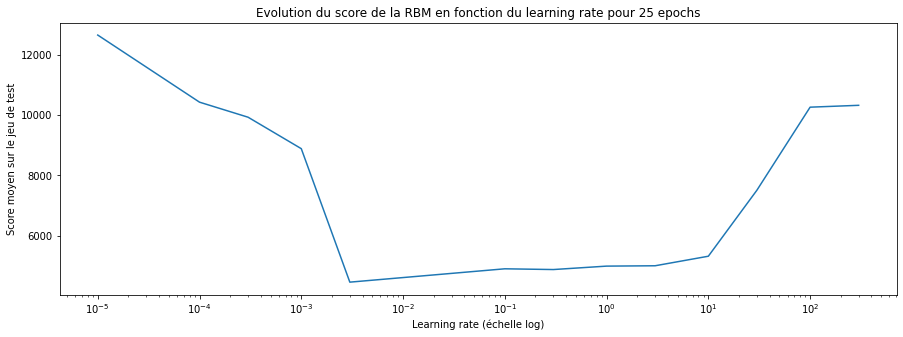

In [133]:
plt.rcParams['figure.figsize'] = [15, 5]
plt.plot(learning_rates, score_lr)
plt.title("Evolution du score de la RBM en fonction du learning rate pour 25 epochs")
plt.xlabel("Learning rate (échelle log)")
plt.ylabel("Score moyen sur le jeu de test")
plt.xscale("log")
plt.show()

Le learning rate obtenant le meilleur score via ce test est de 0.003. Le nombre d'epoch étant fixé arbitrairement à 25, ce résultat ne garantit pas que les learning rate inférieurs soient réllement moins bon pour le modèle. On peut en revanche éliminer les learning rate supérieurs à 1 sans soucis. <br>

## 3.6. Etude de l'impact du batch_size

Dernier paramètre étudié : la taille d'un batch d'entraînement. J'ai fait varier ce paramètre entre 1 et 5000 (maximum que j'ai réussi à faire tourner avec ma RAM) <br>
Les autres paramètres sont fixés ainsi :
* hidden nodes 150
* iter sample 70
* learning rate 0.003
* epoch 25

Les résultats obtenus en fonction des différents learning rate sont présentés ci-dessous.

In [37]:
score_batch = []
for bs in batch_sizes:
  score_batch.append(score_rbm(rbm_bs[bs]))
  print(f"{datetime.now().strftime('%H:%M:%S')} : Score : {score_batch}")

18:45:16 : Score : [8620.453]
18:45:34 : Score : [8620.453, 7907.6567]
18:45:52 : Score : [8620.453, 7907.6567, 3770.9973]
18:46:09 : Score : [8620.453, 7907.6567, 3770.9973, 2489.4224]
18:46:27 : Score : [8620.453, 7907.6567, 3770.9973, 2489.4224, 1498.71]
18:46:45 : Score : [8620.453, 7907.6567, 3770.9973, 2489.4224, 1498.71, 1189.8693]
18:47:03 : Score : [8620.453, 7907.6567, 3770.9973, 2489.4224, 1498.71, 1189.8693, 903.6367]
18:47:21 : Score : [8620.453, 7907.6567, 3770.9973, 2489.4224, 1498.71, 1189.8693, 903.6367, 851.7042]
18:47:39 : Score : [8620.453, 7907.6567, 3770.9973, 2489.4224, 1498.71, 1189.8693, 903.6367, 851.7042, 844.7381]
18:47:57 : Score : [8620.453, 7907.6567, 3770.9973, 2489.4224, 1498.71, 1189.8693, 903.6367, 851.7042, 844.7381, 870.8511]
18:48:15 : Score : [8620.453, 7907.6567, 3770.9973, 2489.4224, 1498.71, 1189.8693, 903.6367, 851.7042, 844.7381, 870.8511, 1052.9727]


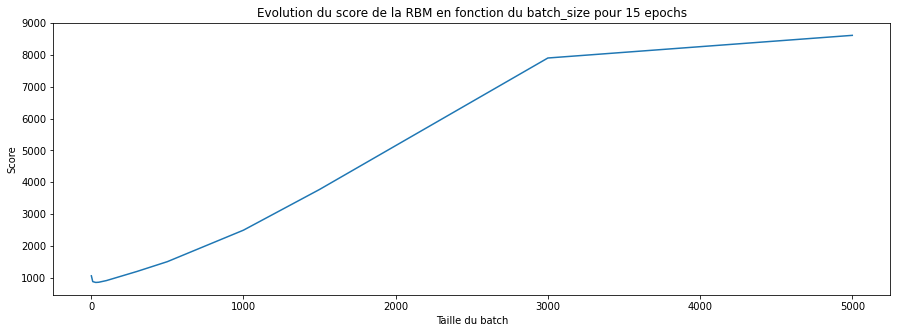

In [44]:
plt.rcParams['figure.figsize'] = [15, 5]
plt.plot(batch_sizes, score_batch)
plt.title("Evolution du score de la RBM en fonction du batch_size pour 25 epochs")
plt.xlabel("Taille du batch")
plt.ylabel("Score moyen sur le jeu de test")
plt.show()

On remarque que les scores sont bien meilleurs pour des petites valeurs de batch size (minimum obtenu pour batch_size = 30 sur ce graphe). En revanche, le temps d'entraîenemnt varie de manière inversement proportionnel à la taille du batch. <br> 

## 3.7. Génération du "meilleur modèle"

L'étude des différents paramètres précédemment effectuée permet d'estimer les ordres de grandeur à donner aux différents paramètres pour obtenir un bon modèle. J'ai choisi les valeurs suivantes pour entraîner un modèle robuste :
* Nombre de hidden nodes : 1000 pour le petit gain de qualité
* Learning rate :  0.001 (et non 0.003) en augmentant le nombre d'epoch pour compenser
* Iter sample : 70 
* Batch size : 100 et non 30, pour réduire le temps d'entraînement
* epoch : 50, pour compenser la réduction du learning rate

De même que précédemment, les paramètres du RBM entraîné ont été stockés dans 3 fichiers .npy. Les résultats obtenus sont affichés ci-dessous (courbes des valeurs de loss et MSE durant l'entraînement + affichage de 12 images issues du jeu de test)

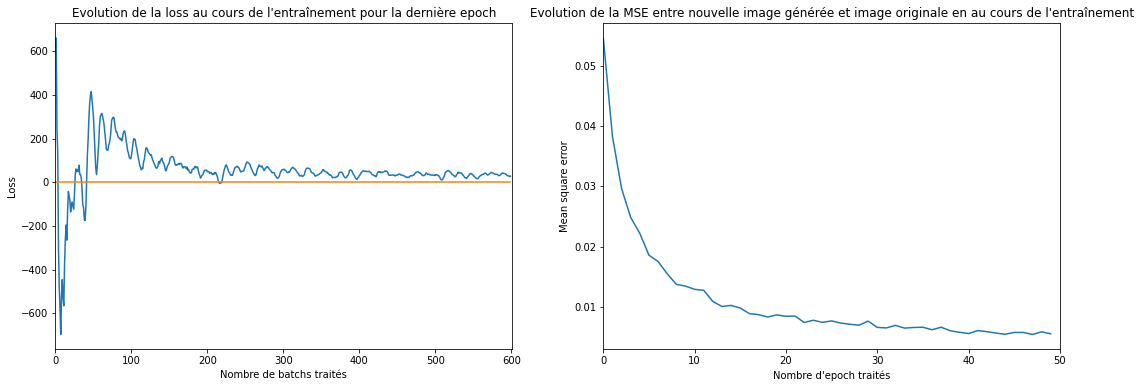

In [136]:
mean_loss = np.load("best_model/rbm_1000hidden_100bs_0.001lr_50epoch_mean_loss.npy")
mse_loss = np.load("best_model/rbm_1000hidden_100bs_0.001lr_50epoch_mse.npy")
plt.rcParams['figure.figsize'] = [18, 6]
fig, axs = plt.subplots(1, 2)
z = np.zeros(600)
axs[0].plot(mean_loss)
axs[0].plot(z)
axs[0].set_title("Evolution de la loss au cours de l'entraînement pour la dernière epoch")
axs[0].set_xlabel("Nombre de batchs traités")
axs[0].set_xlim(0, 601)
axs[0].set_ylabel("Loss")
axs[1].plot(mse_loss)
axs[1].set_title("Evolution de la MSE entre nouvelle image générée et image originale en au cours de l'entraînement")
axs[1].set_xlabel("Nombre d'epoch traités")
axs[1].set_xlim(0, 50)
axs[1].set_ylabel("Mean square error")
plt.show()

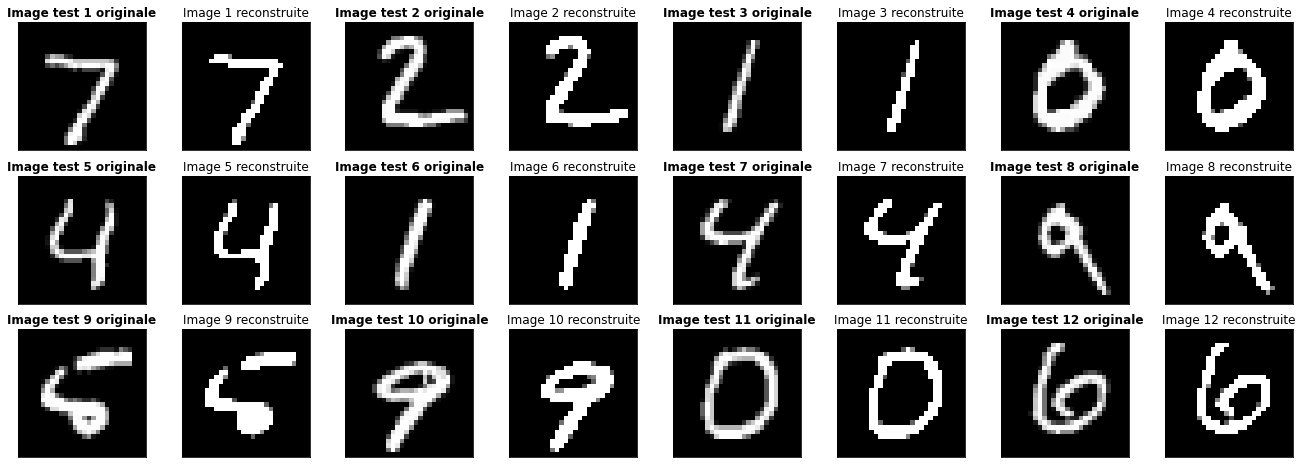

In [135]:
best_rbm = load_rbm("best_model/rbm_1000hidden_100bs_0.001lr_50epoch")
plt.rcParams['figure.figsize'] = [23, 8]
fig, axs = plt.subplots(3, 8)
for i in range(12):
  X = x_test[i]
  axs[math.floor(i/4), 2*i % 8].imshow(X, cmap="gray")
  axs[math.floor(i/4), 2*i % 8].grid(False)
  axs[math.floor(i/4), 2*i % 8].set_xticks([])
  axs[math.floor(i/4), 2*i % 8].set_yticks([])
  axs[math.floor(i/4), 2*i % 8].set_title(f"Image test {i+1} originale", fontweight="bold")
  img_rec = reconstruct_img(X, best_rbm)
  axs[math.floor(i/4), (2*i+1) % 8].imshow(img_rec, cmap="gray")
  axs[math.floor(i/4), (2*i+1) % 8].grid(False)
  axs[math.floor(i/4), (2*i+1) % 8].set_xticks([])
  axs[math.floor(i/4), (2*i+1) % 8].set_yticks([])
  axs[math.floor(i/4), (2*i+1) % 8].set_title(f"Image {i+1} reconstruite")
plt.show()

Les images reconstruites sont effectivemet de bonne qualité, elles semblent même plus nettes que les images originales. <br>
On peut également comparer le score de ce modèle aux précédents scores obtenus, afin de confirmer que notre metric de score est cohérente 

In [142]:
best_score = score_rbm(best_rbm)
print(f"Score minimal obtenu via l'étude du nombre de hidden units : {np.min(score)}")
print(f"Score minimal obtenu via l'étude du learning rate          : {np.min(score_lr)}")
print(f"Score minimal obtenu via l'étude de iter sample            : {np.min(score_iter)}")
print(f"Score minimal obtenu via l'étude de la taille de batch     : {np.min(score_batch)}")
print(f"Score obtenu pour le meilleur modèle                       : {best_score}")

Score minimal obtenu via l'étude du nombre de hidden units : 959.2484130859375
Score minimal obtenu via l'étude du learning rate          : 4454.5595703125
Score minimal obtenu via l'étude de iter sample            : 1979.3408203125
Score minimal obtenu via l'étude de la taille de batch     : 844.7380981445312
Score obtenu pour le meilleur modèle                       : 603.10302734375


Le score de ce nouveau modèle est bien inférieur à ceux précédemment obtenus.

De même que pour le 1er modèle entraîné sur les 6, on peut essayer de visualiser la distribution apprise par notre modèle graĉe à la fonction sample.

*Génération d'images via sample itéré 70 fois :*

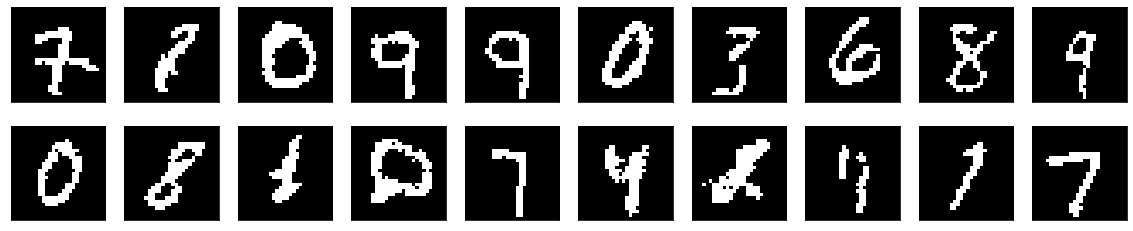

In [158]:
plt.rcParams['figure.figsize'] = [20, 4]
fig, axs = plt.subplots(2, 10)
for i in range(20):
  new_img = best_rbm.sample(1, 70).reshape(28,28)
  axs[math.floor(i/10), i % 10].imshow(new_img, cmap="gray")
  axs[math.floor(i/10), i % 10].grid(False)
  axs[math.floor(i/10), i % 10].set_xticks([])
  axs[math.floor(i/10), i % 10].set_yticks([])
plt.show()

Le modèle semble générer un des 10 chiffres de manière aléatoire. Les résultats obtenus ne sont pas aussi nets que ceux générer à partir d'une image de chiffre, mais restent reconnaissables pour la plupart (et sont nettement plus précis que l'image obtenue pour le 6 de la 1ère RBM entraînée).
On peut par la même occasion revérifier les résultats obtenus concernant le paramètre d'itération de l'échantillonneur de Gibbs en faisant varier iteration sample

*Génération d'images via sample itéré 150 fois :*

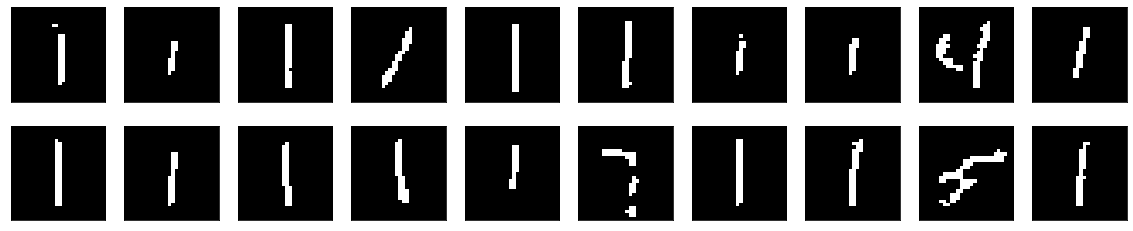

In [165]:
plt.rcParams['figure.figsize'] = [20, 4]
fig, axs = plt.subplots(2, 10)
for i in range(20):
  new_img = best_rbm.sample(1, 150).reshape(28,28)
  axs[math.floor(i/10), i % 10].imshow(new_img, cmap="gray")
  axs[math.floor(i/10), i % 10].grid(False)
  axs[math.floor(i/10), i % 10].set_xticks([])
  axs[math.floor(i/10), i % 10].set_yticks([])
plt.show()

*Génération d'images via sample itéré 30 fois :*

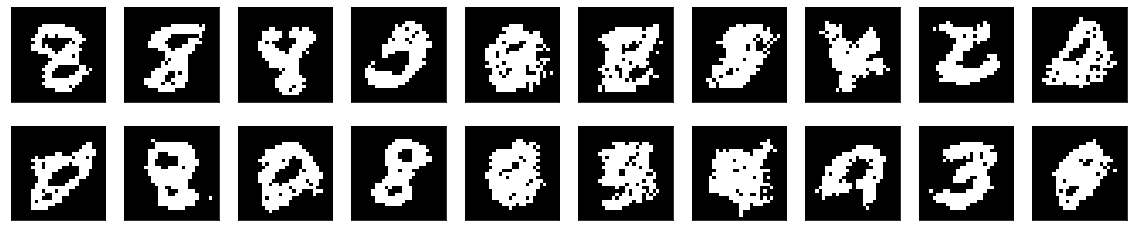

In [159]:
plt.rcParams['figure.figsize'] = [20, 4]
fig, axs = plt.subplots(2, 10)
for i in range(20):
  new_img = best_rbm.sample(1, 30).reshape(28,28)
  axs[math.floor(i/10), i % 10].imshow(new_img, cmap="gray")
  axs[math.floor(i/10), i % 10].grid(False)
  axs[math.floor(i/10), i % 10].set_xticks([])
  axs[math.floor(i/10), i % 10].set_yticks([])
plt.show()

On retrouve que des valeurs d'itérations trop faibles donnent de moins bon résultats (images plus floues, chiffres non identifiables). <br>
Un résultat amusant est qu'en augmentant le nombre d'itérations, le modèle semble générer principalement des `1` (et des `7` ?!)

In [166]:
for chiffre in range(10):
  x_chiffre = x_train[y_train == chiffre]
  print(f"Nombre d'observations correspondant au chiffre {chiffre} : {x_chiffre.shape[0]}")

Nombre d'observations correspondant au chiffre 0 : 5923
Nombre d'observations correspondant au chiffre 1 : 6742
Nombre d'observations correspondant au chiffre 2 : 5958
Nombre d'observations correspondant au chiffre 3 : 6131
Nombre d'observations correspondant au chiffre 4 : 5842
Nombre d'observations correspondant au chiffre 5 : 5421
Nombre d'observations correspondant au chiffre 6 : 5918
Nombre d'observations correspondant au chiffre 7 : 6265
Nombre d'observations correspondant au chiffre 8 : 5851
Nombre d'observations correspondant au chiffre 9 : 5949


Le jeu d'entraînement du MNIST n'est pas parfaitement équilibré, il contient plus d'images de 1. L'échantilloneur de Gibbs convergeant vers la distribution lorsque le nombre d'itérations augmente, il semble donc cohérent qu'un plus grand nombre de `1` soit généré lors k augmente.

## 3.8. Tests du modèle obtenu

A présent que notre modèle optimal est entraîné, il est possible de jouer avec pour tester ses limites

### 3.8.1. Test avec des images générées à la main

Les seules images avec lesquelles les modèles ont été testées jusqu'à présent sont issues de la base MNIST. Bien que séparées en jeu d'entraînement et de test, les images sont néanmoins relativement similaires <br>
J'ai donc décidé de tester mon modèle sur des chiffres déssinés sous Gimp, et écrits à la main, pris en photos et convertis en noir et blanc. <rb>
Les résultats sont présentés ci-dessous, pour le meilleur modèle entraîné, et pour un modèle entraîné avec 150 hidden units à titre de comparaison.

Images GIMP best model :

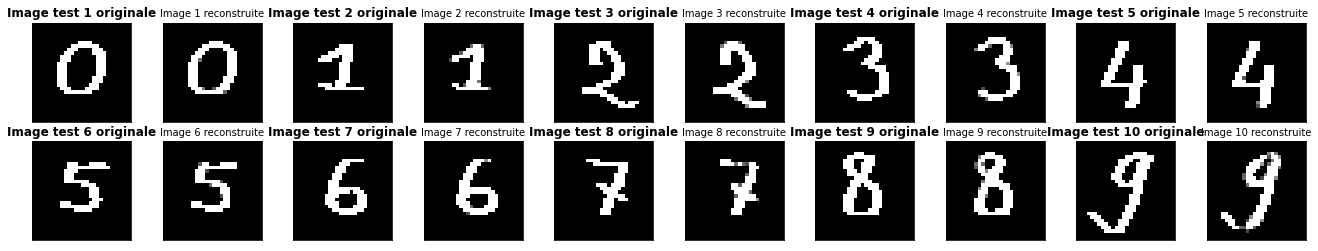

In [153]:
plt.rcParams['figure.figsize'] = [23, 4]
fig, axs = plt.subplots(2, 10)
for i in range(10):
  with open(f"{i}.png", "rb") as f:
    img = plt.imread(f) * 255
    axs[math.floor(i/5), 2*i % 10].imshow(img, cmap="gray")
    axs[math.floor(i/5), 2*i % 10].grid(False)
    axs[math.floor(i/5), 2*i % 10].set_xticks([])
    axs[math.floor(i/5), 2*i % 10].set_yticks([])
    axs[math.floor(i/5), 2*i % 10].set_title(f"Image test {i+1} originale", fontweight="bold")
    img_rec = reconstruct_img(img, best_rbm)
    axs[math.floor(i/5), (2*i+1) % 10].imshow(img_rec, cmap="gray")
    axs[math.floor(i/5), (2*i+1) % 10].grid(False)
    axs[math.floor(i/5), (2*i+1) % 10].set_xticks([])
    axs[math.floor(i/5), (2*i+1) % 10].set_yticks([])
    axs[math.floor(i/5), (2*i+1) % 10].set_title(f"Image {i+1} reconstruite", fontsize=10)
plt.show()

Images GIMP 150 hidden nodes :

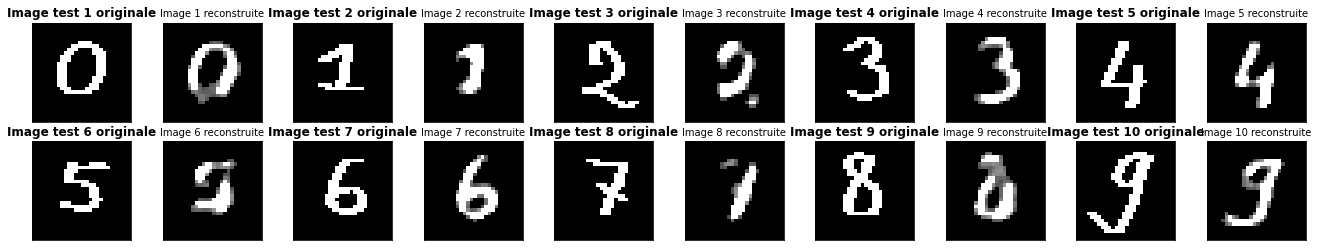

In [154]:
plt.rcParams['figure.figsize'] = [23, 4]
fig, axs = plt.subplots(2, 10)
for i in range(10):
  with open(f"{i}.png", "rb") as f:
    img = plt.imread(f) * 255
    axs[math.floor(i/5), 2*i % 10].imshow(img, cmap="gray")
    axs[math.floor(i/5), 2*i % 10].grid(False)
    axs[math.floor(i/5), 2*i % 10].set_xticks([])
    axs[math.floor(i/5), 2*i % 10].set_yticks([])
    axs[math.floor(i/5), 2*i % 10].set_title(f"Image test {i+1} originale", fontweight="bold")
    img_rec = reconstruct_img(img, rbm_hiddens[150])
    axs[math.floor(i/5), (2*i+1) % 10].imshow(img_rec, cmap="gray")
    axs[math.floor(i/5), (2*i+1) % 10].grid(False)
    axs[math.floor(i/5), (2*i+1) % 10].set_xticks([])
    axs[math.floor(i/5), (2*i+1) % 10].set_yticks([])
    axs[math.floor(i/5), (2*i+1) % 10].set_title(f"Image {i+1} reconstruite", fontsize=10)
plt.show()

Images manuelles best model :

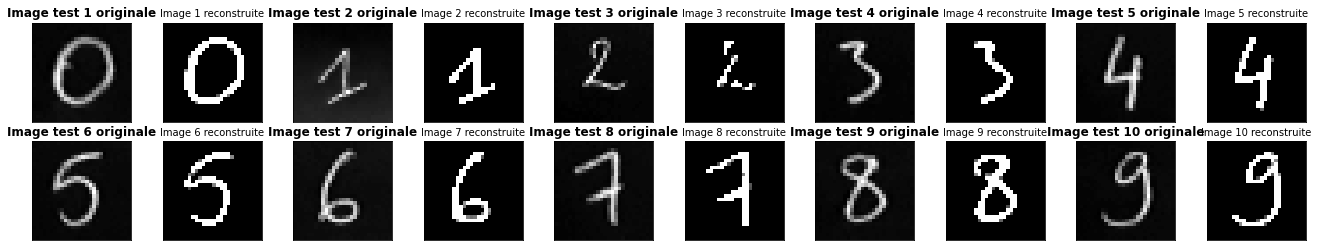

In [167]:
plt.rcParams['figure.figsize'] = [23, 4]
fig, axs = plt.subplots(2, 10)
for i in range(10):
  with open(f"hand_{i}_inverted.png", "rb") as f:
    img = plt.imread(f) * 255
    axs[math.floor(i/5), 2*i % 10].imshow(img, cmap="gray")
    axs[math.floor(i/5), 2*i % 10].grid(False)
    axs[math.floor(i/5), 2*i % 10].set_xticks([])
    axs[math.floor(i/5), 2*i % 10].set_yticks([])
    axs[math.floor(i/5), 2*i % 10].set_title(f"Image test {i+1} originale", fontweight="bold")
    img_rec = reconstruct_img(img, best_rbm)
    axs[math.floor(i/5), (2*i+1) % 10].imshow(img_rec, cmap="gray")
    axs[math.floor(i/5), (2*i+1) % 10].grid(False)
    axs[math.floor(i/5), (2*i+1) % 10].set_xticks([])
    axs[math.floor(i/5), (2*i+1) % 10].set_yticks([])
    axs[math.floor(i/5), (2*i+1) % 10].set_title(f"Image {i+1} reconstruite", fontsize=10)
plt.show()

Images manuelles 150 hidden units :

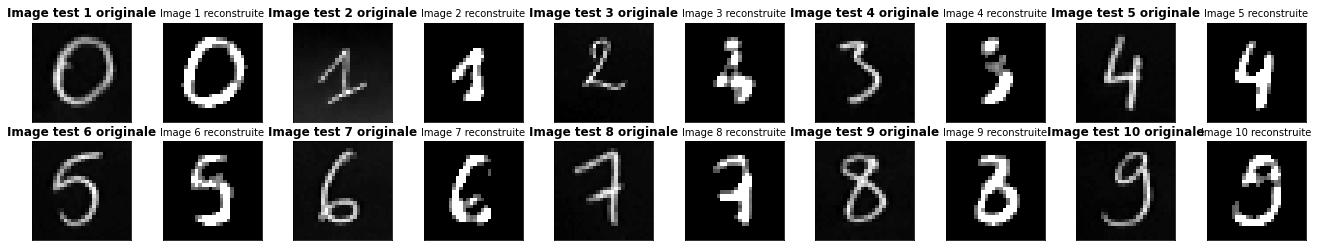

In [168]:
plt.rcParams['figure.figsize'] = [23, 4]
fig, axs = plt.subplots(2, 10)
for i in range(10):
  with open(f"hand_{i}_inverted.png", "rb") as f:
    img = plt.imread(f) * 255
    axs[math.floor(i/5), 2*i % 10].imshow(img, cmap="gray")
    axs[math.floor(i/5), 2*i % 10].grid(False)
    axs[math.floor(i/5), 2*i % 10].set_xticks([])
    axs[math.floor(i/5), 2*i % 10].set_yticks([])
    axs[math.floor(i/5), 2*i % 10].set_title(f"Image test {i+1} originale", fontweight="bold")
    img_rec = reconstruct_img(img, rbm_hiddens[150])
    axs[math.floor(i/5), (2*i+1) % 10].imshow(img_rec, cmap="gray")
    axs[math.floor(i/5), (2*i+1) % 10].grid(False)
    axs[math.floor(i/5), (2*i+1) % 10].set_xticks([])
    axs[math.floor(i/5), (2*i+1) % 10].set_yticks([])
    axs[math.floor(i/5), (2*i+1) % 10].set_title(f"Image {i+1} reconstruite", fontsize=10)
plt.show()

On remarque que les images générées à partir du meilleur modèle sont de qualité équivalent, voire supérieure (en particulier pour les chiffres écrits au stylo fin), aux images originales. <br>
Les images générées via le 2ème modèle sont de moins bonne qualité, mais restent relativement bonnes.

### 3.8.3. Test sur des images aléatoires

De même que pour la première RBM entraînée, on peut tester de générer des chiffres à partir du bruit avec notre modèle

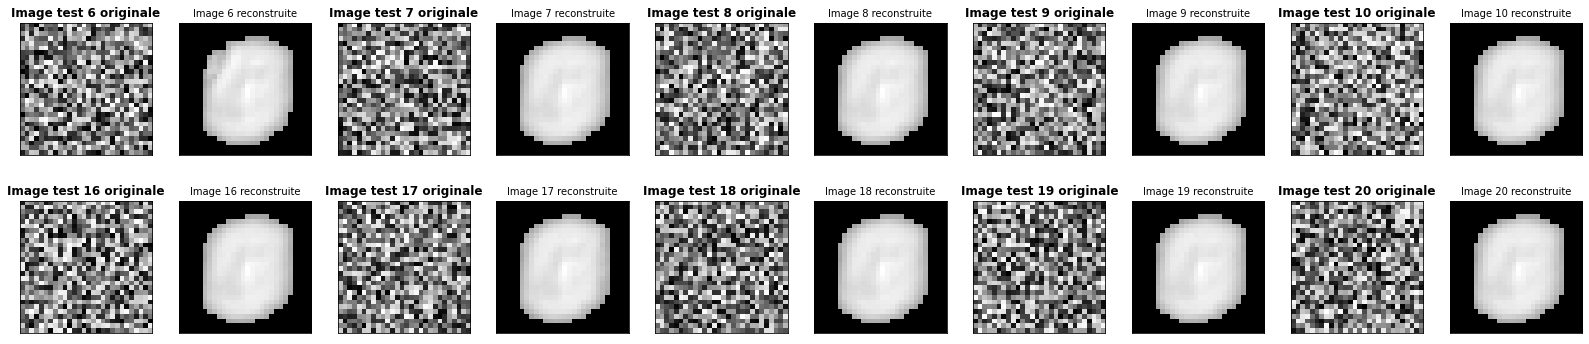

In [182]:
plt.rcParams['figure.figsize'] = [28, 6]
fig, axs = plt.subplots(2, 10)
np.random.seed(42)
for i in range(20):
  rand = np.random.randint(0, high=255, size=(28,28), dtype=int)
  img_rec = reconstruct_img(rand, best_rbm)
  axs[math.floor(i/10), 2*i % 10].imshow(rand, cmap="gray")
  axs[math.floor(i/10), 2*i % 10].grid(False)
  axs[math.floor(i/10), 2*i % 10].set_xticks([])
  axs[math.floor(i/10), 2*i % 10].set_yticks([])
  axs[math.floor(i/10), 2*i % 10].set_title(f"Image test {i+1} originale", fontweight="bold")
  axs[math.floor(i/10), (2*i+1) % 10].imshow(img_rec, cmap="gray")
  axs[math.floor(i/10), (2*i+1) % 10].grid(False)
  axs[math.floor(i/10), (2*i+1) % 10].set_xticks([])
  axs[math.floor(i/10), (2*i+1) % 10].set_yticks([])
  axs[math.floor(i/10), (2*i+1) % 10].set_title(f"Image {i+1} reconstruite", fontsize=10)

Le modèle génère une image blanche, au milieu de laquelle on devine une sorte de 3... Je ne saurais pas interpréter ce résultat... Je me serait plutôt attendu à une image noire, étant donné que la distribution de bruit n'est a priori proche d'aucun chiffre en particulier...

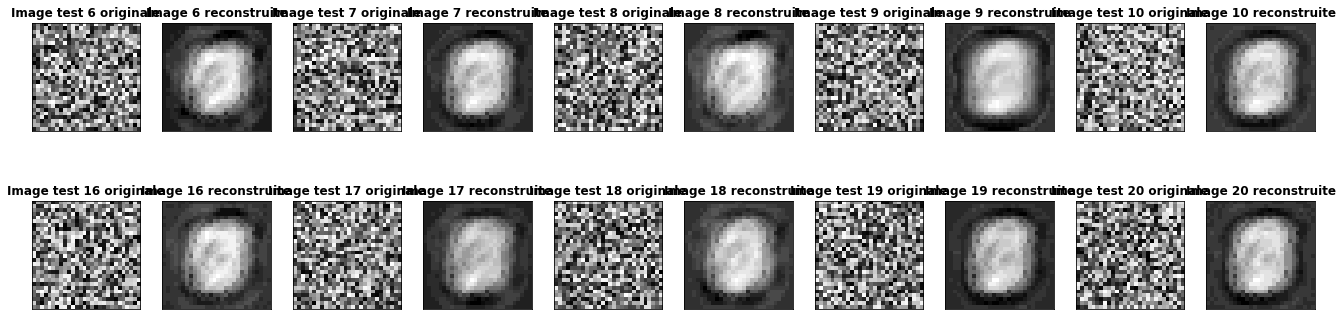

In [171]:
plt.rcParams['figure.figsize'] = [23, 6]
fig, axs = plt.subplots(2, 10)
np.random.seed(42)
for i in range(20):
  rand = np.random.randint(0, high=255, size=(28,28), dtype=int)
  img_rec = reconstruct_img(rand, rbm_hiddens[1000])
  axs[math.floor(i/10), 2*i % 10].imshow(rand, cmap="gray")
  axs[math.floor(i/10), 2*i % 10].grid(False)
  axs[math.floor(i/10), 2*i % 10].set_xticks([])
  axs[math.floor(i/10), 2*i % 10].set_yticks([])
  axs[math.floor(i/10), 2*i % 10].set_title(f"Image test {i+1} originale", fontweight="bold")
  axs[math.floor(i/10), (2*i+1) % 10].imshow(img_rec, cmap="gray")
  axs[math.floor(i/10), (2*i+1) % 10].grid(False)
  axs[math.floor(i/10), (2*i+1) % 10].set_xticks([])
  axs[math.floor(i/10), (2*i+1) % 10].set_yticks([])
  axs[math.floor(i/10), (2*i+1) % 10].set_title(f"Image {i+1} reconstruite", fontweight="bold")

Résultat aussi étrange avec un autre modèle entraîné avec 1000 hidden units